<a href="https://colab.research.google.com/github/jazkre/NAEX/blob/main/01NAEX_Exercise_05_R_solution.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>


# O1NAEX Exercise 05

J.Kreanová

In [ ]:
cat(system('sudo apt-get install -y gmp', intern=TRUE), sep = "\n")
cat(system('sudo apt-get install -y partitions', intern=TRUE), sep = "\n")
cat(system('sudo apt-get install -y DoE.base', intern=TRUE), sep = "\n")

list_of_packages <- c("tidyverse","MASS","FrF2","pid","rsm") # "agricolae","nortest","lattice","pwr",
missing_packages <- list_of_packages[!(list_of_packages %in% installed.packages()[,"Package"])]
missing_packages
if(length(missing_packages)) install.packages(missing_packages)
lapply(list_of_packages, library, character.only = TRUE)


Warning message in system("sudo apt-get install -y gmp", intern = TRUE):
“running command 'sudo apt-get install -y gmp' had status 100”


Reading package lists...
Building dependency tree...
Reading state information...


Warning message in system("sudo apt-get install -y partitions", intern = TRUE):
“running command 'sudo apt-get install -y partitions' had status 100”


Reading package lists...
Building dependency tree...
Reading state information...
Reading package lists...
Building dependency tree...
Reading state information...
The following additional packages will be installed:
  r-cran-combinat r-cran-conf.design r-cran-gmp r-cran-lmtest r-cran-mathjaxr
  r-cran-numbers r-cran-partitions r-cran-polynom r-cran-runit r-cran-sets
  r-cran-vcd r-cran-zoo
Suggested packages:
  r-cran-proxy r-cran-mvtnorm r-cran-kernlab r-cran-hsaur3 r-cran-coin
The following NEW packages will be installed:
  r-cran-combinat r-cran-conf.design r-cran-doe.base r-cran-gmp r-cran-lmtest
  r-cran-mathjaxr r-cran-numbers r-cran-partitions r-cran-polynom r-cran-runit
  r-cran-sets r-cran-vcd r-cran-zoo
0 upgraded, 13 newly installed, 0 to remove and 19 not upgraded.
Need to get 7,968 kB of archives.
After this operation, 13.9 MB of additional disk space will be used.
Get:1 http://archive.ubuntu.com/ubuntu jammy/universe amd64 r-cran-combinat all 0.0-8-7build1 [43.1 kB]
Get:

[1] "FrF2" "pid"  "rsm"

Installing packages into ‘/usr/local/lib/R/site-library’
(as ‘lib’ is unspecified)

also installing the dependencies ‘sfsmisc’, ‘scatterplot3d’, ‘igraph’, ‘png’, ‘FrF2.catlg128’, ‘estimability’


── Attaching core tidyverse packages ──────────────────────── tidyverse 2.0.0 ──
✔ dplyr     1.1.3     ✔ readr     2.1.4
✔ forcats   1.0.0     ✔ stringr   1.5.0
✔ ggplot2   3.4.4     ✔ tibble    3.2.1
✔ lubridate 1.9.3     ✔ tidyr     1.3.0
✔ purrr     1.0.2     
── Conflicts ────────────────────────────────────────── tidyverse_conflicts() ──
✖ dplyr::filter() masks stats::filter()
✖ dplyr::lag()    masks stats::lag()
ℹ Use the conflicted package (<http://conflicted.r-lib.org/>) to force all conflicts to become errors

Attaching package: ‘MASS’


The following object is masked from ‘package:dplyr’:

    select


Loading required package: DoE.base

Loading required package: grid

Loading required package: conf.design

Registered S3 method overwritten by 'DoE.base':
  method           from      

[[1]]
 [1] "lubridate" "forcats"   "stringr"   "dplyr"     "purrr"     "readr"    
 [7] "tidyr"     "tibble"    "ggplot2"   "tidyverse" "stats"     "graphics" 
[13] "grDevices" "utils"     "datasets"  "methods"   "base"     

[[2]]
 [1] "MASS"      "lubridate" "forcats"   "stringr"   "dplyr"     "purrr"    
 [7] "readr"     "tidyr"     "tibble"    "ggplot2"   "tidyverse" "stats"    
[13] "graphics"  "grDevices" "utils"     "datasets"  "methods"   "base"     

[[3]]
 [1] "FrF2"        "DoE.base"    "conf.design" "grid"        "MASS"       
 [6] "lubridate"   "forcats"     "stringr"     "dplyr"       "purrr"      
[11] "readr"       "tidyr"       "tibble"      "ggplot2"     "tidyverse"  
[16] "stats"       "graphics"    "grDevices"   "utils"       "datasets"   
[21] "methods"     "base"       

[[4]]
 [1] "pid"         "FrF2"        "DoE.base"    "conf.design" "grid"       
 [6] "MASS"        "lubridate"   "forcats"     "stringr"     "dplyr"      
[11] "purrr"       "readr"       "tidyr"       "tibble"      "ggplot2"    
[16] "tidyverse"   "stats"       "graphics"    "grDevices"   "utils"      
[21] "datasets"    "methods"     "base"       

[[5]]
 [1] "rsm"         "pid"         "FrF2"        "DoE.base"    "conf.design"
 [6] "grid"        "MASS"        "lubridate"   "forcats"     "stringr"    
[11] "dplyr"       "purrr"       "readr"       "tidyr"       "tibble"     
[16] "ggplot2"     "tidyverse"   "stats"       "graphics"    "grDevices"  
[21] "utils"       "datasets"    "methods"     "base"

In [ ]:
tibble::tibble(
  Package = names(installed.packages()[,3]),
  Version = unname(installed.packages()[,3])
)

Package,Version
<chr>,<chr>
estimability,1.4.1
FrF2,2.3-3
FrF2.catlg128,1.2-3
igraph,1.5.1
IRdisplay,1.1
IRkernel,1.3.2
pbdZMQ,0.3-10
pid,0.50
png,0.1-8


##	Problem 6.1
from the chapter 6, D. C. Montgomery DAoE - 8. edition.

An engineer is interested in the effects of cutting
speed (A), tool geometry (B), and cutting angle (C) on the life
(in hours) of a machine tool. Two levels of each factor are
chosen, and three replicates of a 23 factorial design are run.
The results are as follows:

In [ ]:
df61 <- read.table("https://raw.githubusercontent.com/francji1/01NAEX/main/data/Problem_6_1.txt",header=TRUE,sep=";")
head(df61)

,CuttingSpeed,ToolGeometry,CuttingAngle,LifeHours
,<int>,<int>,<int>,<int>
1,-1,-1,-1,22
2,-1,-1,-1,31
3,-1,-1,-1,25
4,1,-1,-1,32
5,1,-1,-1,43
6,1,-1,-1,29



1. Estimate the factor effects. Which effects appear to be
large?
2. Use the analysis of variance to confirm your conclusions
for part (a).
3. Write down a regression model for predicting tool life
(in hours) based on the results of this experiment.
4. Analyze the residuals. Are there any obvious problems?
5. On the basis of an analysis of main effect and interaction
plots, what coded factor levels of A, B, and C
would you recommend using?
6. Reconsider task 3. Use the regression
model to generate response surface and contour plots of the
tool life response. Interpret these plots. Do they provide insight
regarding the desirable operating conditions for this process?
7. Find the standard error of the factor effects and
approximate 95 percent confidence limits for the factor effects. Do the results of this analysis agree with the conclusions from the analysis of variance?



# 0 .Data Preprocessing

In [ ]:
df61

CuttingSpeed,ToolGeometry,CuttingAngle,LifeHours
<int>,<int>,<int>,<int>
-1,-1,-1,22
-1,-1,-1,31
-1,-1,-1,25
1,-1,-1,32
1,-1,-1,43
1,-1,-1,29
-1,1,-1,35
-1,1,-1,34
-1,1,-1,50


In [ ]:
str(df61)

'data.frame':	24 obs. of  4 variables:
 $ CuttingSpeed: int  -1 -1 -1 1 1 1 -1 -1 -1 1 ...
 $ ToolGeometry: int  -1 -1 -1 -1 -1 -1 1 1 1 1 ...
 $ CuttingAngle: int  -1 -1 -1 -1 -1 -1 -1 -1 -1 -1 ...
 $ LifeHours   : int  22 31 25 32 43 29 35 34 50 55 ...


In [ ]:
df61$A=factor(df61$CuttingSpeed)
df61$B=factor(df61$ToolGeometry)
df61$C=factor(df61$CuttingAngle)

### $2^3$ factorial design  

**A** - Cutting Speed

**B** - Tool Geometry

**C** - Cutting Angle



In [ ]:
df61=df61[, c('A','B','C','LifeHours')]
head(df61)

,A,B,C,LifeHours
,<fct>,<fct>,<fct>,<int>
1,-1,-1,-1,22
2,-1,-1,-1,31
3,-1,-1,-1,25
4,1,-1,-1,32
5,1,-1,-1,43
6,1,-1,-1,29


In [ ]:
tb<- df61 %>%
  group_by(A, B, C) %>%
  summarise(RI = LifeHours[1], RII = ifelse(n() >= 2, LifeHours[2], NA), RIII = ifelse(n() == 3, LifeHours[3], NA)) %>%
  ungroup()

`summarise()` has grouped output by 'A', 'B'. You can override using the
`.groups` argument.


In [ ]:
tb$Total=tb$RI+tb$RII+tb$RIII
tb$notation<-c('(1)','c','b','bc','a','ac','ab','abc')
tb

A,B,C,RI,RII,RIII,Total,notation
<fct>,<fct>,<fct>,<int>,<int>,<int>,<int>,<chr>
-1,-1,-1,22,31,25,78,(1)
-1,-1,1,44,45,38,127,c
-1,1,-1,35,34,50,119,b
-1,1,1,60,50,54,164,bc
1,-1,-1,32,43,29,104,a
1,-1,1,40,37,36,113,ac
1,1,-1,55,47,46,148,ab
1,1,1,39,41,47,127,abc


In [ ]:
df <- as.data.frame(tb)
df
#str(df)

A,B,C,RI,RII,RIII,Total,notation
<fct>,<fct>,<fct>,<int>,<int>,<int>,<int>,<chr>
-1,-1,-1,22,31,25,78,(1)
-1,-1,1,44,45,38,127,c
-1,1,-1,35,34,50,119,b
-1,1,1,60,50,54,164,bc
1,-1,-1,32,43,29,104,a
1,-1,1,40,37,36,113,ac
1,1,-1,55,47,46,148,ab
1,1,1,39,41,47,127,abc


# 1. Factor Effects
Estimate the factor effects. Which effects appear to be large?

main effect of A: $A = \frac{1}{4n} (a + ab + ac + abc − (1) − b − c − bc)$

main effect of B: $B =  \frac{1}{4n} (b + ab + bc + abc − (1) − a − c − ac)$

main effect of C: $C = \frac{1}{4n} (c + ac + bc + abc − (1) − a − b − ab)$

interaction of AB: $AB =  \frac{1}{4n}(abc + ab + c + (1) − a − b − ac − bc)$

interaction of AC: $AC =  \frac{1}{4n} (abc + ac + b + (1) − a − c − ab − bc)$

interaction of BC: $BC =  \frac{1}{4n} (abc + bc + a + (1) − b − b − ab − ac)$

interaction of ABC: $ABC =  \frac{1}{4n}(abc + a + b + c − ab − ac − bc − (1))$

In [ ]:
n=3 #replikacie
a <- df$Total[df$notation == 'a']
b <- df$Total[df$notation == 'b']
c <- df$Total[df$notation == 'c']
ab <- df$Total[df$notation == 'ab']
bc <- df$Total[df$notation == 'bc']
ac <- df$Total[df$notation == 'ac']
abc <- df$Total[df$notation == 'abc']
e <- df$Total[df$notation == '(1)']

In [ ]:
df$effect[df$notation=='a']=(a + ab + ac + abc - e - b - c - bc)/(4*n)
df$effect[df$notation=='b']=(b + ab +bc + abc -e -a -c -ac)/(4*n)
df$effect[df$notation=='c']=(c + ac +bc +abc -e -a -b -ab)/(4*n)
df$effect[df$notation=='ab']=(abc + ab +c +e -a -b-ac-bc)/(4*n)
df$effect[df$notation=='ac']=(abc +ac + b +e -a -c -ab -bc)/(4*n)
df$effect[df$notation=='bc']=(abc +bc +a +e -b -c -ab -ac)/(4*n)
df$effect[df$notation=='abc']=(abc +a +b +c -ab -ac -bc -e)/(4*n)

In [ ]:
df

A,B,C,RI,RII,RIII,Total,notation,effect
<fct>,<fct>,<fct>,<int>,<int>,<int>,<int>,<chr>,<dbl>
-1,-1,-1,22,31,25,78,(1),NA
-1,-1,1,44,45,38,127,c,6.8333333
-1,1,-1,35,34,50,119,b,11.3333333
-1,1,1,60,50,54,164,bc,-2.8333333
1,-1,-1,32,43,29,104,a,0.3333333
1,-1,1,40,37,36,113,ac,-8.8333333
1,1,-1,55,47,46,148,ab,-1.6666667
1,1,1,39,41,47,127,abc,-2.1666667


Large appearing effects are for Tool geometry B (11.33) and for a Speed-Angle iteration AC (-8.83).

On contrary Cutting speed A effect appears to be small in comparison to other (0.33).

# 2. ANOVA
Use the analysis of variance to confirm your conclusions for part (a).

In [ ]:
summary(aov(LifeHours ~ A*B*C, df61))

            Df Sum Sq Mean Sq F value   Pr(>F)    
A            1    0.7     0.7   0.022 0.883680    
B            1  770.7   770.7  25.547 0.000117 ***
C            1  280.2   280.2   9.287 0.007679 ** 
A:B          1   16.7    16.7   0.552 0.468078    
A:C          1  468.2   468.2  15.519 0.001172 ** 
B:C          1   48.2    48.2   1.597 0.224475    
A:B:C        1   28.2    28.2   0.934 0.348282    
Residuals   16  482.7    30.2                     
---
Signif. codes:  0 ‘***’ 0.001 ‘**’ 0.01 ‘*’ 0.05 ‘.’ 0.1 ‘ ’ 1

From Anova, we can confirm significance of B,C and AC interaction on a significance level 0.01.

We can reduce the model to A,B,C,AC. A is included to keep hierarchy.

In [ ]:
aov(LifeHours ~ A+B+C +A:C, df61)

Call:
   aov.default(formula = LifeHours ~ A + B + C + A:C, data = df61)

Terms:
                       A        B        C      A:C Residuals
Sum of Squares    0.6667 770.6667 280.1667 468.1667  575.6667
Deg. of Freedom        1        1        1        1        19

Residual standard error: 5.504384
Estimated effects may be unbalanced

In [ ]:
summary(aov(LifeHours ~ A+B+C +A:C, df61))

            Df Sum Sq Mean Sq F value   Pr(>F)    
A            1    0.7     0.7   0.022 0.883641    
B            1  770.7   770.7  25.436 7.22e-05 ***
C            1  280.2   280.2   9.247 0.006724 ** 
A:C          1  468.2   468.2  15.452 0.000897 ***
Residuals   19  575.7    30.3                     
---
Signif. codes:  0 ‘***’ 0.001 ‘**’ 0.01 ‘*’ 0.05 ‘.’ 0.1 ‘ ’ 1

Significance: B,C,AC at 0.01 (1%)

# 3. Regression model
Write down a regression model for predicting tool life (in hours) based on the results of this experiment.

-model without distinguishing replication order

In [ ]:
m1=lm(LifeHours ~ A+B+C +A:C, df61)
summary(m1)

#summary(lm(lh~A*C+B,rs))


Call:
lm.default(formula = LifeHours ~ A + B + C + A:C, data = df61)

Residuals:
    Min      1Q  Median      3Q     Max 
-7.3333 -4.3750 -0.4167  2.9583 11.5000 

Coefficients:
            Estimate Std. Error t value Pr(>|t|)    
(Intercept)   27.167      2.512  10.813 1.47e-09 ***
A1             9.167      3.178   2.884 0.009497 ** 
B1            11.333      2.247   5.043 7.22e-05 ***
C1            15.667      3.178   4.930 9.30e-05 ***
A1:C1        -17.667      4.494  -3.931 0.000897 ***
---
Signif. codes:  0 ‘***’ 0.001 ‘**’ 0.01 ‘*’ 0.05 ‘.’ 0.1 ‘ ’ 1

Residual standard error: 5.504 on 19 degrees of freedom
Multiple R-squared:  0.7253,	Adjusted R-squared:  0.6674 
F-statistic: 12.54 on 4 and 19 DF,  p-value: 3.688e-05


$y_{ijk} =27.167 + 9.167 x_{A} +11.333 x_{b} + 15.667 x_{c} -17.667x_{A}x_{c}$

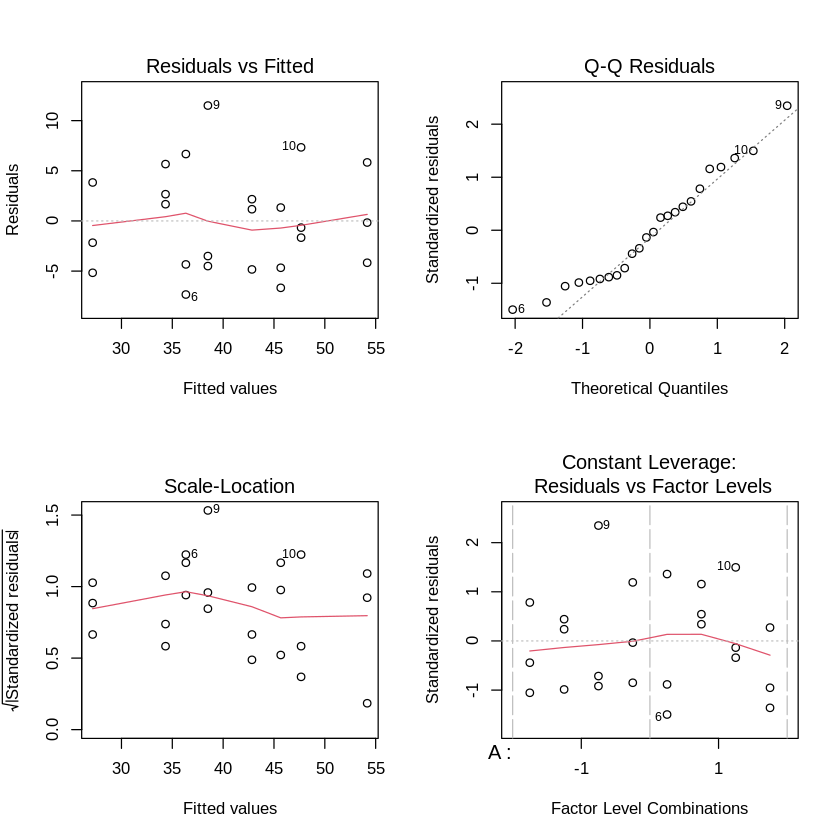

In [ ]:
par(mfrow = c(2, 2))
plot(lm(LifeHours ~ A+B+C +A:C, df61))
par(mfrow = c(1, 1))

-- model that takes into account a form of data measurement by replications:

We wil use [FrF2() ](https://www.r-bloggers.com/2011/05/fractional-factorial-designs-using-frf2/) function to generate apropriate class

In [ ]:
#extract Life Hours
lh<-c(tb$RI,tb$RII,tb$RIII)
lh

rs=rbind(df,df,df)
rs=rs[,c('A','B','C')]
rs <- rs %>%
  mutate(Block = case_when(
    row_number() <= 8 ~ '.1',
    row_number() <= 16 ~ '.2',
    TRUE ~ '.3'
  ))
rs$lh=lh
#rs

[1] 22 44 35 60 32 40 55 39 31 45 34 50 43 37 47 41 25 38 50 54 29 36 46 47

creating full factorial with 8 runs ...




,A,B,C,Blocks,lh
,<fct>,<fct>,<fct>,<fct>,<int>
1,-1,-1,-1,.1,22
2,-1,-1,1,.1,44
3,-1,1,-1,.1,35
4,-1,1,1,.1,60
5,1,-1,-1,.1,32
6,1,-1,1,.1,40
7,1,1,-1,.1,55
8,1,1,1,.1,39
9,-1,-1,-1,.2,31


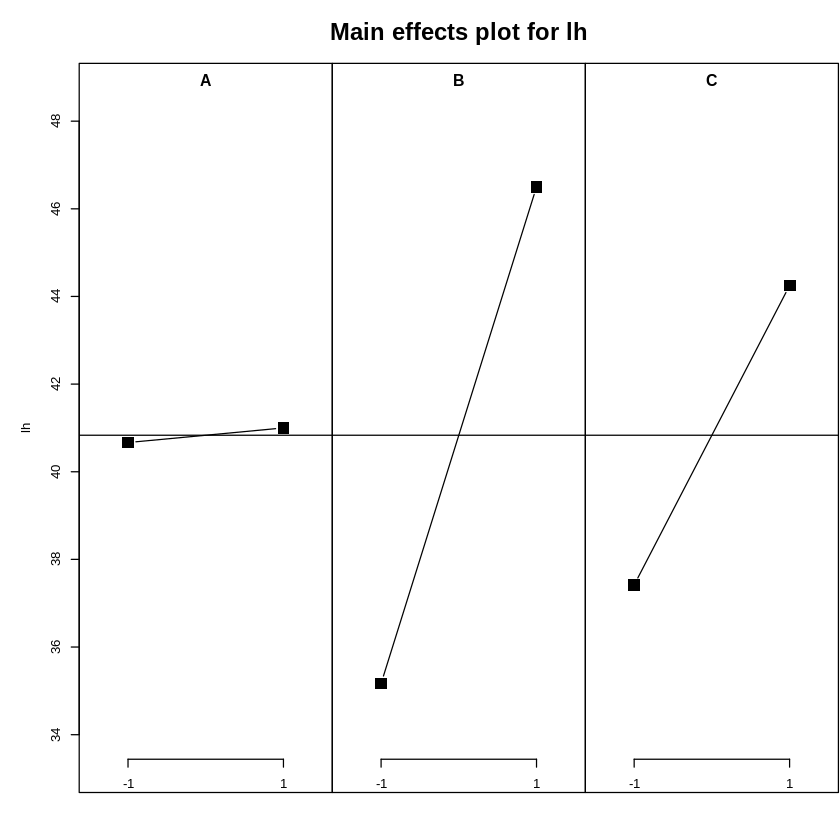

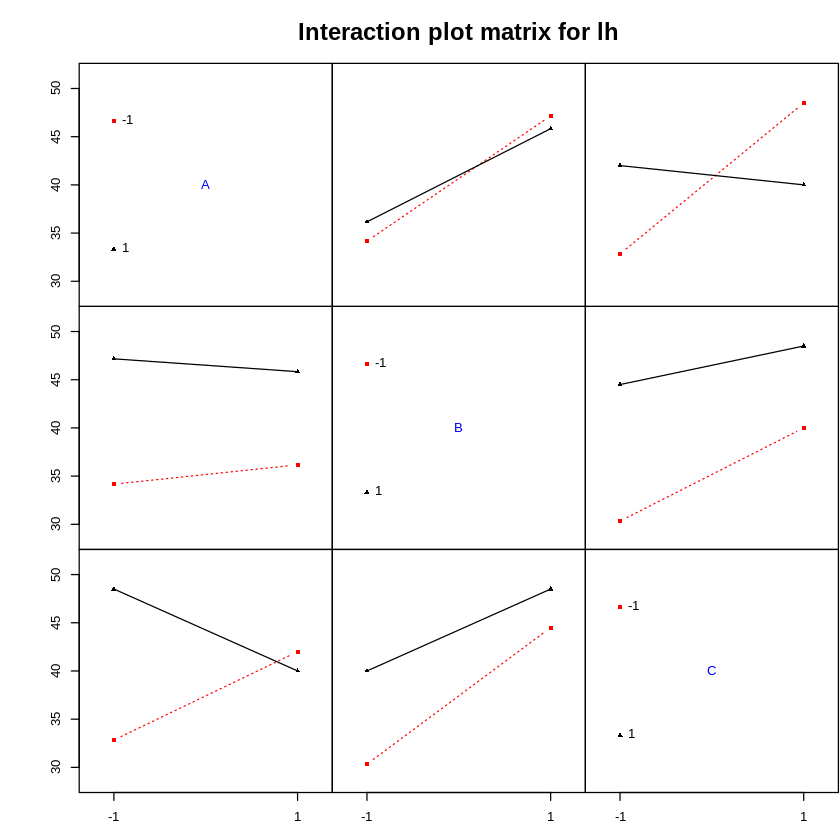

In [ ]:
mFrF2 <-  FrF2(2^n, n, replications = 3, randomize = FALSE,factor.names = c("A", "B", "C"))
#we need to set design matrix thatcorresponds with our response: life hours
mFrF2$A<-rs$A
mFrF2$B<-rs$B
mFrF2$C<-rs$C
mFrF2 <- add.response(mFrF2,response=lh)
mFrF2
MEPlot(mFrF2)
IAPlot(mFrF2)

In [ ]:
summary(lm(lh~A+B+C+A:C,mFrF2))


Call:
lm.default(formula = lh ~ A + B + C + A:C, data = mFrF2)

Residuals:
    Min      1Q  Median      3Q     Max 
-7.3333 -4.3750 -0.4167  2.9583 11.5000 

Coefficients:
            Estimate Std. Error t value Pr(>|t|)    
(Intercept)   27.167      2.512  10.813 1.47e-09 ***
A1             9.167      3.178   2.884 0.009497 ** 
B1            11.333      2.247   5.043 7.22e-05 ***
C1            15.667      3.178   4.930 9.30e-05 ***
A1:C1        -17.667      4.494  -3.931 0.000897 ***
---
Signif. codes:  0 ‘***’ 0.001 ‘**’ 0.01 ‘*’ 0.05 ‘.’ 0.1 ‘ ’ 1

Residual standard error: 5.504 on 19 degrees of freedom
Multiple R-squared:  0.7253,	Adjusted R-squared:  0.6674 
F-statistic: 12.54 on 4 and 19 DF,  p-value: 3.688e-05


$y_{ijk} =40.83 + 3.42 x_{A} +5.67 x_{b} + 0.17 x_{c} -4.2x_{A}x_{c}$

# 4. Residuals
Analyze the residuals. Are there any obvious problems?

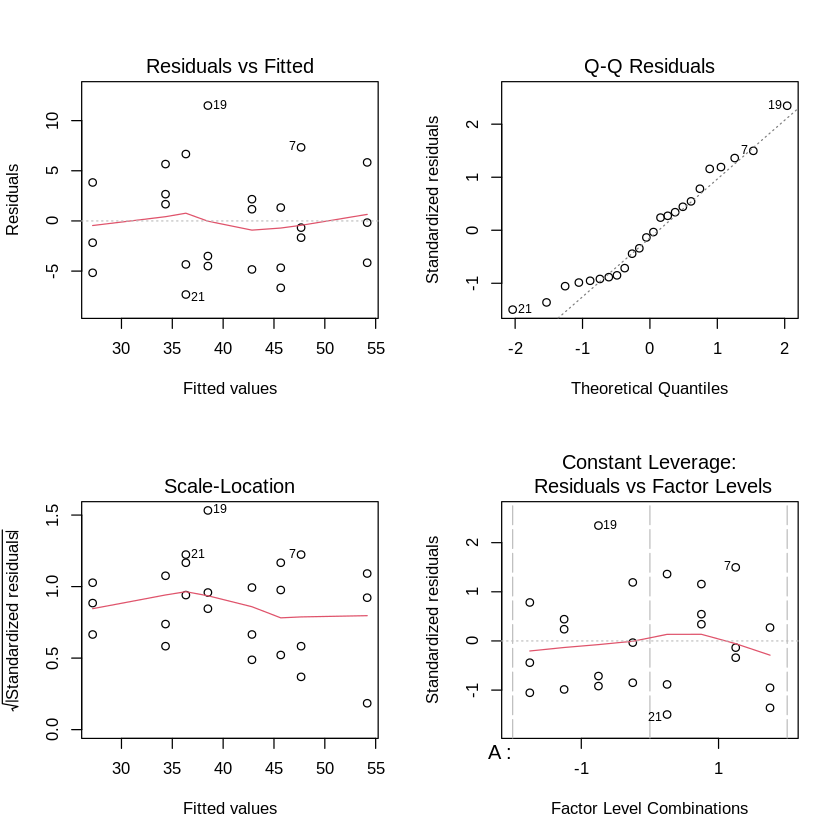

In [ ]:
par(mfrow = c(2, 2))
plot(lm(lh~A+ B +C +A:C,mFrF2))
par(mfrow = c(1, 1))

Residuals do not depict any obvious problems

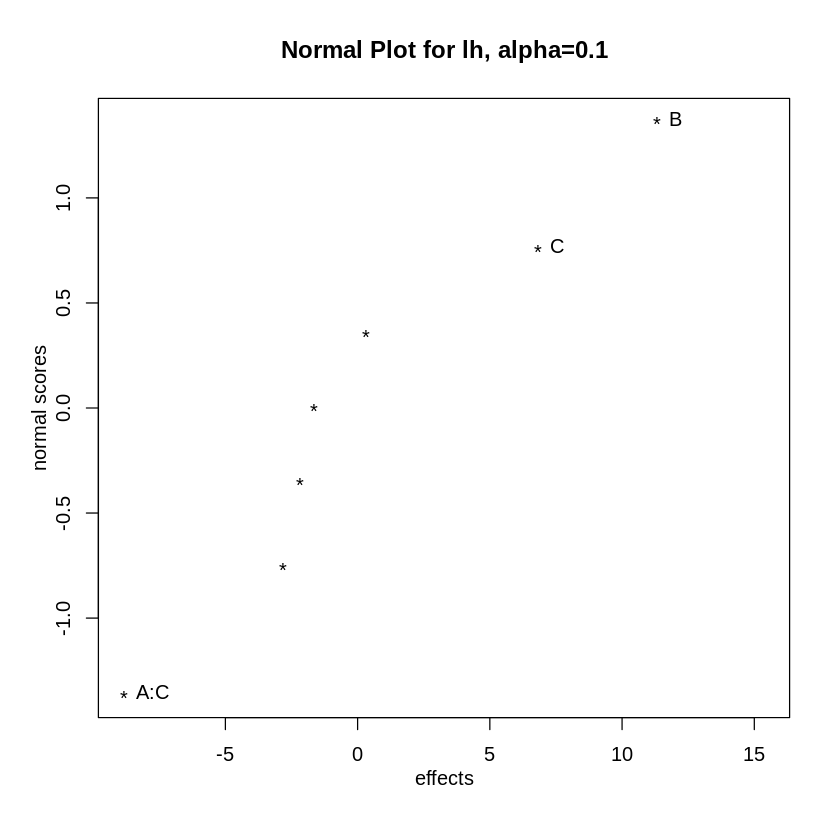

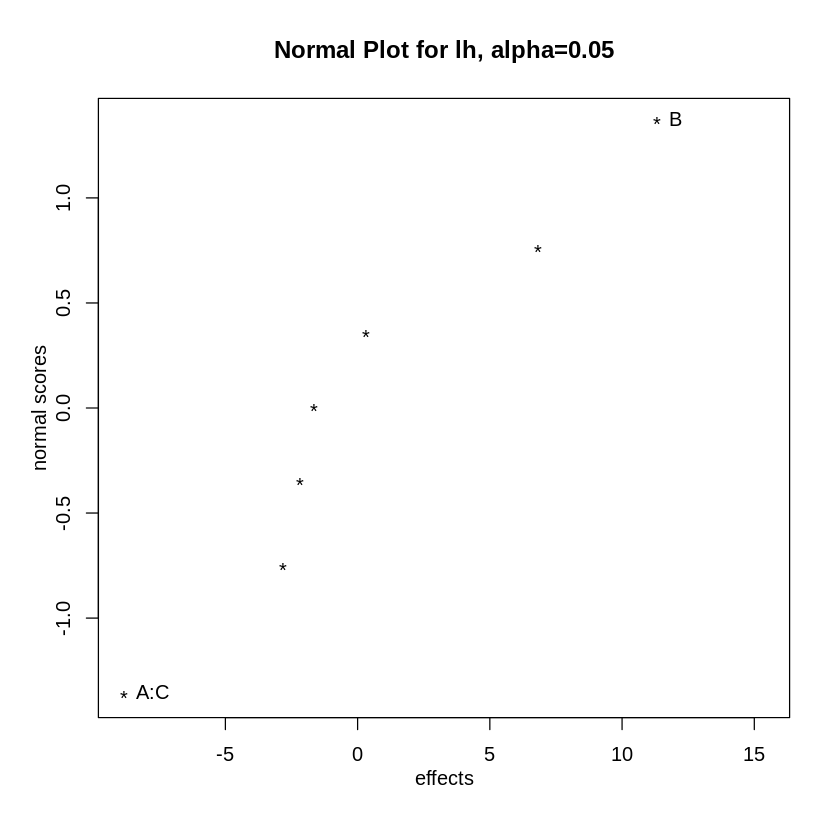

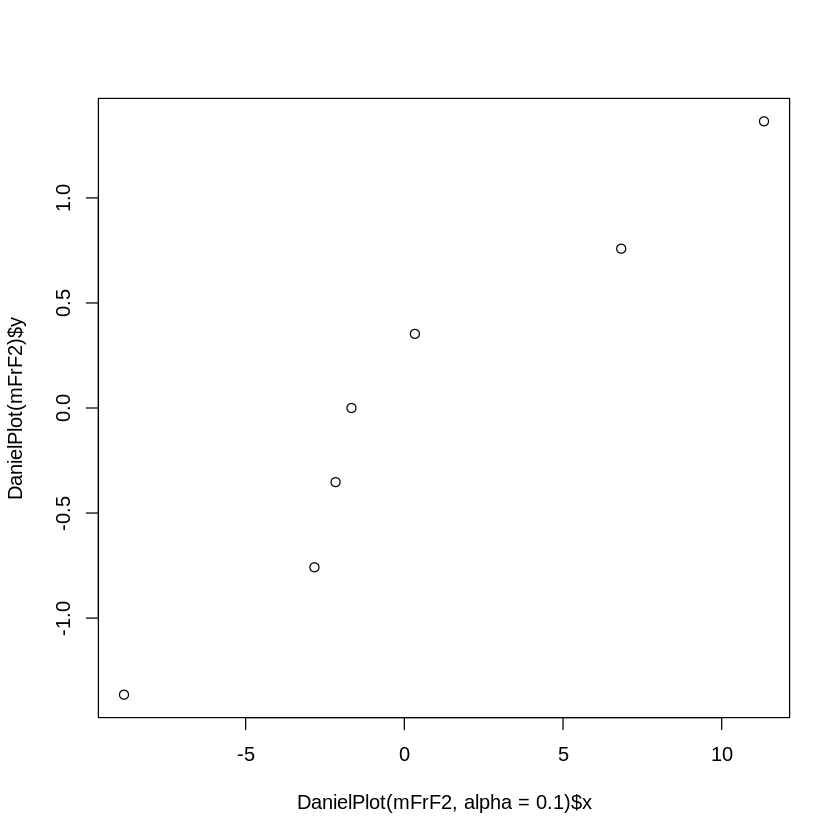

In [ ]:
qqplot(DanielPlot(mFrF2,alpha=0.1)$x,DanielPlot(mFrF2)$y)


# 5. Interaction plots
On the basis of an analysis of main effect and interaction plots, what coded factor levels of A, B, and C would you recommend using?

Due to decreasing effect of interaction AC, the AC plot would be most revealing. The plot shows that in high level of C and low level A the life hours are maximized. (Low level of Cutting Speed and High level of Cutting angle)

B increases lihe hours due to its positive effect.

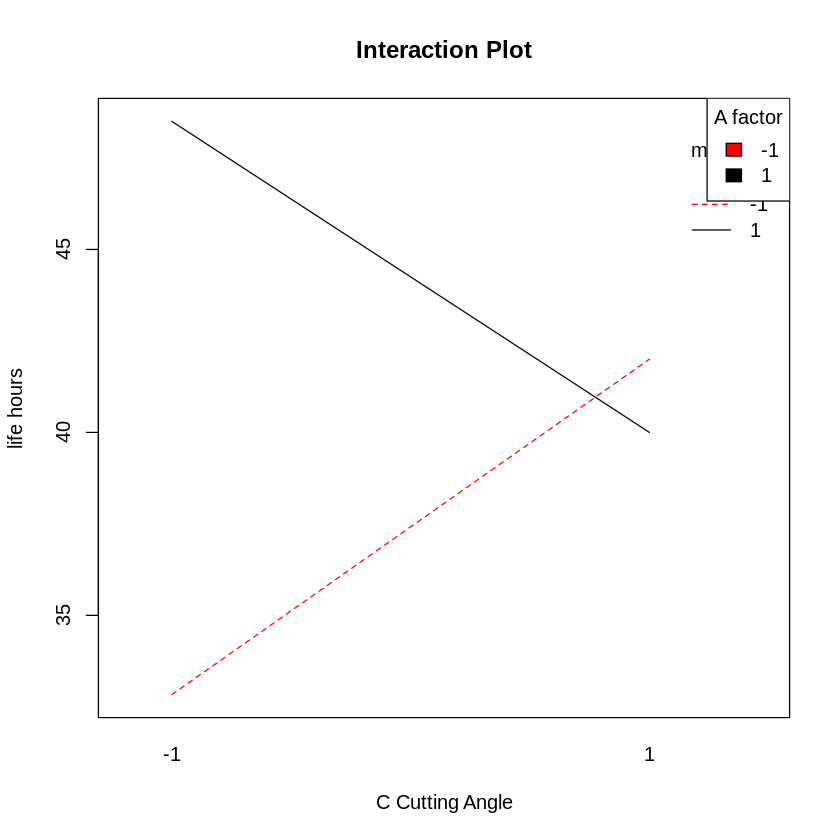

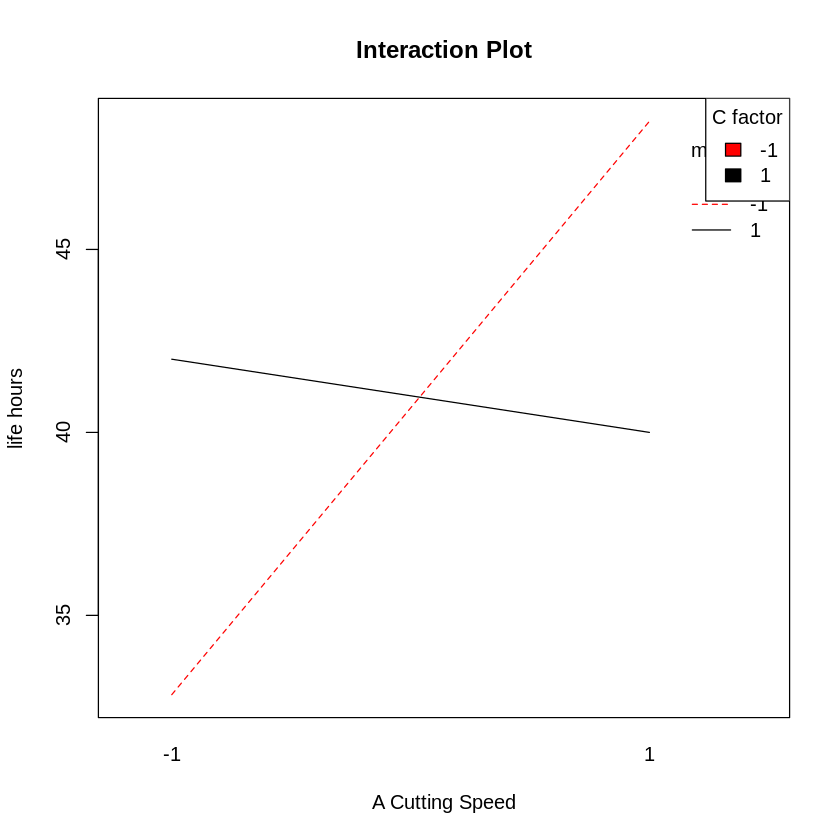

The following object is masked _by_ .GlobalEnv:

    lh


The following object is masked from package:datasets:

    lh




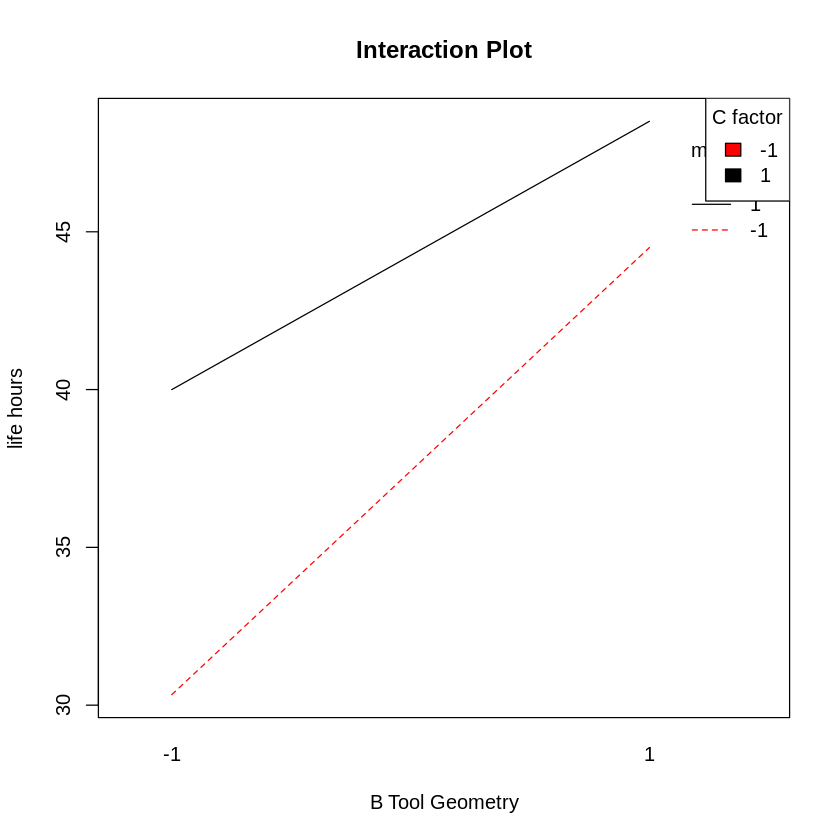

In [ ]:
colors <- c("red", "black")

interaction.plot(mFrF2$A,mFrF2$C,lh,type = "l", col = colors, pch = 19,
                 xlab = "C Cutting Angle", ylab = "life hours", main = "Interaction Plot")
legend("topright", legend = levels(mFrF2$C), fill = colors,title="A factor")
interaction.plot(mFrF2$C,mFrF2$A,lh, col = colors, pch = 19,
                 xlab = "A Cutting Speed", ylab = "life hours", main = "Interaction Plot")
legend("topright", legend = levels(mFrF2$A), fill = colors, title="C factor")

interaction.plot(mFrF2$B,mFrF2$C,lh, col = colors, pch = 19,
                 xlab = "B Tool Geometry", ylab = "life hours", main = "Interaction Plot")
legend("topright", legend = levels(mFrF2$C), fill = colors, title="C factor")

attach(mFrF2)

# 6. Response Surface, Contour plot
Reconsider task 3. Use the regression model to generate response surface and contour plots of the tool life response. Interpret these plots. Do they provide insight regarding the desirable operating conditions for this process?

In [ ]:
#to construct these plots in terms of the natural factor levels
A.num <- as.numeric(as.character(A))
B.num <- as.numeric(as.character(B))
C.num <- as.numeric(as.character(C))

df61.num <- as.data.frame(cbind(lh,A.num,B.num,C.num))
str(df61.num)

'data.frame':	24 obs. of  4 variables:
 $ lh   : num  22 44 35 60 32 40 55 39 31 45 ...
 $ A.num: num  -1 -1 -1 -1 1 1 1 1 -1 -1 ...
 $ B.num: num  -1 -1 1 1 -1 -1 1 1 -1 -1 ...
 $ C.num: num  -1 1 -1 1 -1 1 -1 1 -1 1 ...


In [ ]:
m_num<- lm(lh~A.num*C.num+B.num)
summary(m_num)


Call:
lm.default(formula = lh ~ A.num * C.num + B.num)

Residuals:
    Min      1Q  Median      3Q     Max 
-7.3333 -4.3750 -0.4167  2.9583 11.5000 

Coefficients:
            Estimate Std. Error t value Pr(>|t|)    
(Intercept)  40.8333     1.1236  36.342  < 2e-16 ***
A.num         0.1667     1.1236   0.148 0.883641    
C.num         3.4167     1.1236   3.041 0.006724 ** 
B.num         5.6667     1.1236   5.043 7.22e-05 ***
A.num:C.num  -4.4167     1.1236  -3.931 0.000897 ***
---
Signif. codes:  0 ‘***’ 0.001 ‘**’ 0.01 ‘*’ 0.05 ‘.’ 0.1 ‘ ’ 1

Residual standard error: 5.504 on 19 degrees of freedom
Multiple R-squared:  0.7253,	Adjusted R-squared:  0.6674 
F-statistic: 12.54 on 4 and 19 DF,  p-value: 3.688e-05


$y_{ijk} =40.83 + 3.42 x_{A} +5.67 x_{b} + 0.17 x_{c} -4.2x_{A}x_{c}$

Model has not changed due to fact, that original level values count +1 or -1 naturally. We would see a change with different values of levels.

In [ ]:
#contourPlot(lsmodel,
#            xlab=attr(lsmodel$terms,'term.labels')[1],
#            ylab=attr(lsmodel$terms,'term.labels')[2],
#            main="Contour plot",
#            N=25,
#            xlim=c(-3.2, 3.2),
#            ylim=c(-3.2, 3.2),
#            colour.function=terrain.colors)

Warning message:
“The dot-dot notation (`..level..`) was deprecated in ggplot2 3.4.0.
ℹ Please use `after_stat(level)` instead.
ℹ The deprecated feature was likely used in the pid package.
  Please report the issue at <https://bitbucket.org/kevindunn/r-pid>.”


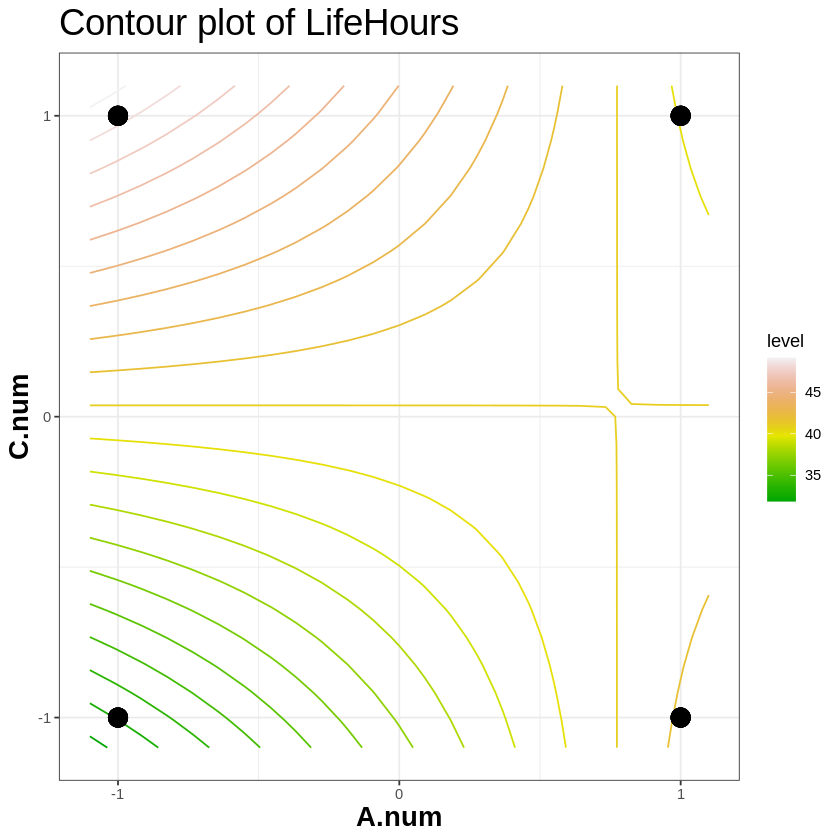

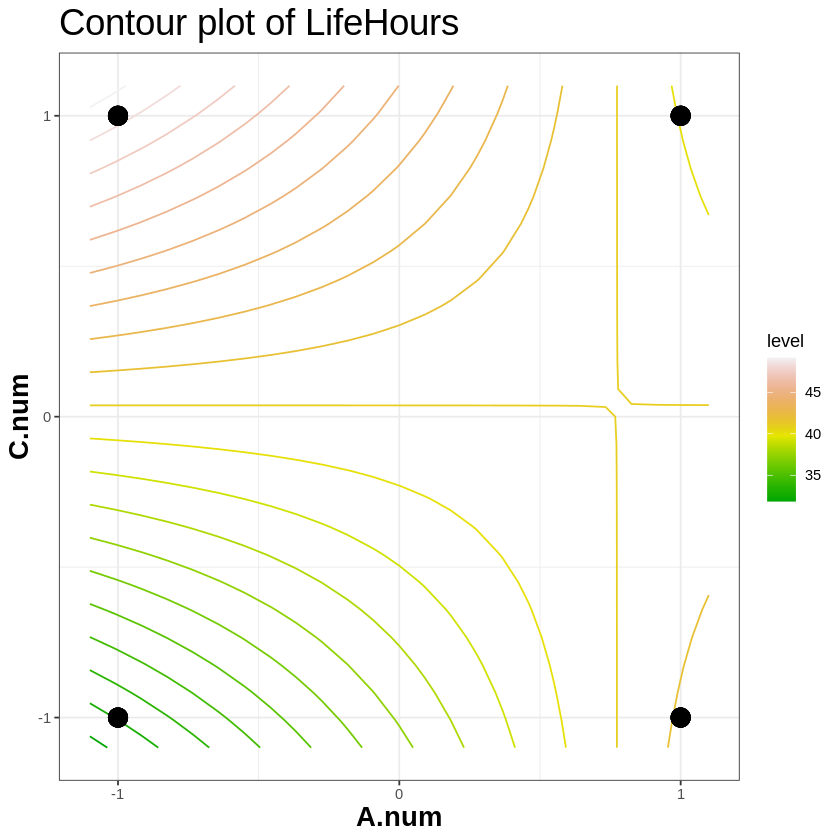

In [ ]:
contourPlot(m_num,
            xlab="A.num",ylab="C.num",
            main="Contour plot of LifeHours",
            xlim=c(-1.1, 1.1),
            ylim=c(-1.1, 1.1),
            colour.function=terrain.colors)

In [ ]:
rsm_abc<-rsm(lh~FO(A.num,C.num)+TWI(A.num,C.num), data=df61.num)

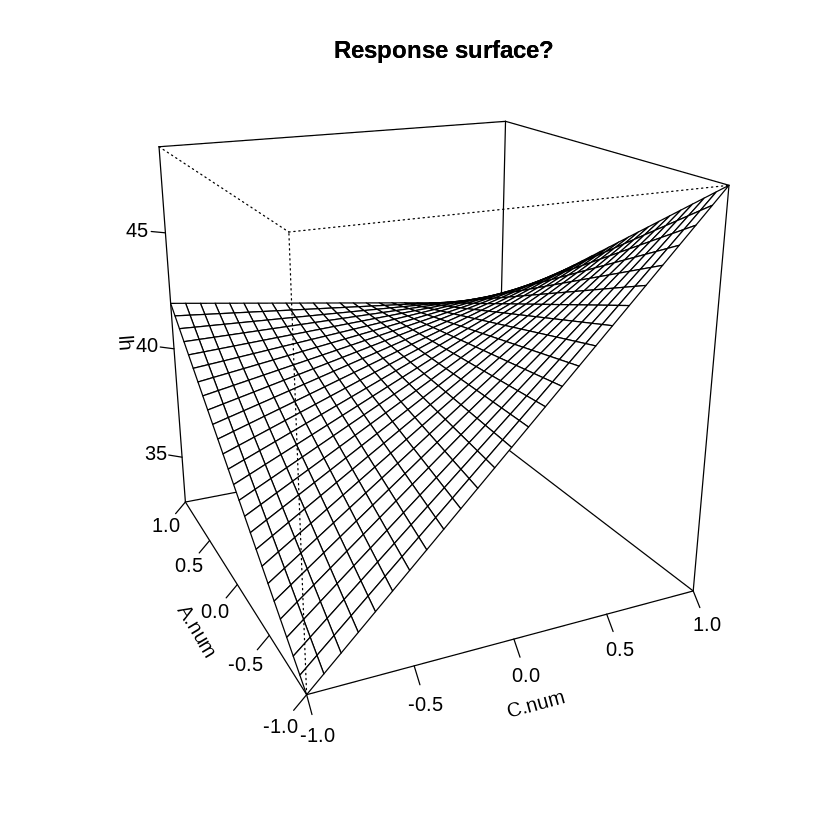

In [ ]:
persp(rsm_abc, A.num~C.num, zlab = "lh", main="Response surface?")

Plots show dependance of Life Hours to A and C. These plots allow us to show the lifehours based on AC interaction. We can observe high point of LH.

# 7. Standard error of factor effects
 Find the standard error of the factor effects and approximate 95 percent confidence limits for the factor effects. Do the results of this analysis agree with the conclusions from the analysis of variance?

Standard error of model coefficients:

$se( \hat{β}) =\sqrt{\frac{\sigma^{2}}{2n^{k}}}=\sqrt{\frac{MS_{E}}{2n^{k}}}=1.38$

The standard errors of all model coefficients are equal because
the design is orthogonal.

In [ ]:
summary(aov(lh~A+B+C+A:C))

            Df Sum Sq Mean Sq F value   Pr(>F)    
A            1    0.7     0.7   0.022 0.883641    
B            1  770.7   770.7  25.436 7.22e-05 ***
C            1  280.2   280.2   9.247 0.006724 ** 
A:C          1  468.2   468.2  15.452 0.000897 ***
Residuals   19  575.7    30.3                     
---
Signif. codes:  0 ‘***’ 0.001 ‘**’ 0.01 ‘*’ 0.05 ‘.’ 0.1 ‘ ’ 1

In [ ]:
MSe=summary(aov(lh~A+B+C+A:C))[[1]]$"Mean Sq"[5]
se=sqrt(MSe/(2*2^3))
se

[1] 1.376096

In [ ]:
summary(lm(lh~A+B+C+A:C))


Call:
lm.default(formula = lh ~ A + B + C + A:C)

Residuals:
    Min      1Q  Median      3Q     Max 
-7.3333 -4.3750 -0.4167  2.9583 11.5000 

Coefficients:
            Estimate Std. Error t value Pr(>|t|)    
(Intercept)   27.167      2.512  10.813 1.47e-09 ***
A1             9.167      3.178   2.884 0.009497 ** 
B1            11.333      2.247   5.043 7.22e-05 ***
C1            15.667      3.178   4.930 9.30e-05 ***
A1:C1        -17.667      4.494  -3.931 0.000897 ***
---
Signif. codes:  0 ‘***’ 0.001 ‘**’ 0.01 ‘*’ 0.05 ‘.’ 0.1 ‘ ’ 1

Residual standard error: 5.504 on 19 degrees of freedom
Multiple R-squared:  0.7253,	Adjusted R-squared:  0.6674 
F-statistic: 12.54 on 4 and 19 DF,  p-value: 3.688e-05


Confidence interval on model coefficients:

$\hat{β} − t_{α/2,df_{E}} se( \hat{β}) ≤ β ≤ \hat{β} + t_{α/2,df_{E}} se(\hat{β})$



In [ ]:
dfe=length(lh)-5
shift=MSe* qt(0.975, df = dfe)

#lm(lh~A+B+C+A:C)$coefficients

lh.lm<-lm(lh~A+B+C+A:C)
lh.CIl<-lh.lm$coefficients-shift
lh.CIu<-lh.lm$coefficients+shift

In [ ]:
#tibble(lh.lm$coefficients,lh.CIl,lh.CIu)


The estimated standard error would be found by replacing σ^2  by its estimate S^2 and taking the
square root of this last expression:

$se(Effect) = \frac{2S}{n2^{k}}, S^{2}\doteq MS_{E}$

The 100(1 - α	) percent confidence intervals on the effects are:

$Effect \pm t_{α/2,df_{E}} se( \hat{β}) $

In [ ]:
head(df)

,A,B,C,RI,RII,RIII,Total,notation,effect
,<fct>,<fct>,<fct>,<int>,<int>,<int>,<int>,<chr>,<dbl>
1,-1,-1,-1,22,31,25,78,(1),NA
2,-1,-1,1,44,45,38,127,c,6.8333333
3,-1,1,-1,35,34,50,119,b,11.3333333
4,-1,1,1,60,50,54,164,bc,-2.8333333
5,1,-1,-1,32,43,29,104,a,0.3333333
6,1,-1,1,40,37,36,113,ac,-8.8333333


In [ ]:
es=2*sqrt(MSe)/sqrt(2*2^3)
df$CI_l<-df$effect-es* qt(0.975, df = dfe)
df$CI_u<-df$effect+es* qt(0.975, df = dfe)

In [ ]:
df <-df %>%
  mutate(signif_ef = ifelse(
    (CI_l*CI_u)>0, '*', ''
  ))
  df

A,B,C,RI,RII,RIII,Total,notation,effect,CI_l,CI_u,signif_ef
<fct>,<fct>,<fct>,<int>,<int>,<int>,<int>,<chr>,<dbl>,<dbl>,<dbl>,<chr>
-1,-1,-1,22,31,25,78,(1),NA,NA,NA,NA
-1,-1,1,44,45,38,127,c,6.8333333,1.072929,12.593738,*
-1,1,-1,35,34,50,119,b,11.3333333,5.572929,17.093738,*
-1,1,1,60,50,54,164,bc,-2.8333333,-8.593738,2.927071,
1,-1,-1,32,43,29,104,a,0.3333333,-5.427071,6.093738,
1,-1,1,40,37,36,113,ac,-8.8333333,-14.593738,-3.072929,*
1,1,-1,55,47,46,148,ab,-1.6666667,-7.427071,4.093738,
1,1,1,39,41,47,127,abc,-2.1666667,-7.927071,3.593738,


As our previous analysis, confidence intervals for **Effects** of B,C and AC do not contain zero which means, the mentioned effects significant.